# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# To try selecting customers that vary signficantly from one another
# we will use the following algorithm.

# First we define `customers that vary significantly from one another`
# by comparing the sum of differences between their spendings on each item.
# The higher the distance, the more variation between the 3 selected customers.
def calculate_distance(c1, c2, c3):
    dist = 0
    for i in data.keys():
        dist += abs(c1[i] - c2[i])
        dist += abs(c1[i] - c3[i])
        dist += abs(c2[i] - c3[i])
    return dist

# We don't need the optimal result (O(n^3)), so we'll take 2000 samples and select
# the sample that has the highest distance

# generate all possible combinations (without repetitions)
def compute_samples():
    samples = []
    for i in xrange(1,440):
        for j in xrange(i, 440):
            for k in range(j, 440):
                samples.append((i, j, k))
    return samples

# select 440 tuples of 3 indexes
from time import time
import random
start = time()
random.seed(10)
selected_samples = random.sample(compute_samples(), 2000)

# compute total distance between selected samples
# and select the maximum distance
max_distance = 0
max_indexes = ()
cur_distance = 0
for s in selected_samples:
    cur_distance = calculate_distance(data.loc[s[0]], data.loc[s[1]], data.loc[s[2]])
    if cur_distance > max_distance:
        max_distance = cur_distance
        max_indexes = s
elapsed = time() - start

In [4]:
# Print selected indexes
print "Max Distance: ", max_distance
print "Max Indexes: ", max_indexes
print "Finished in {:.3f}s".format(elapsed)

Max Distance:  453346
Max Indexes:  (85, 239, 350)
Finished in 7.176s


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,47493,2567,3779,5243,828,2253
2,3521,1099,1997,1796,173,995


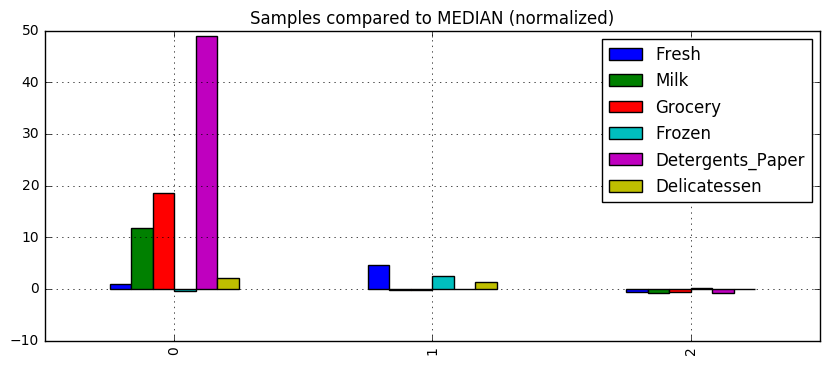

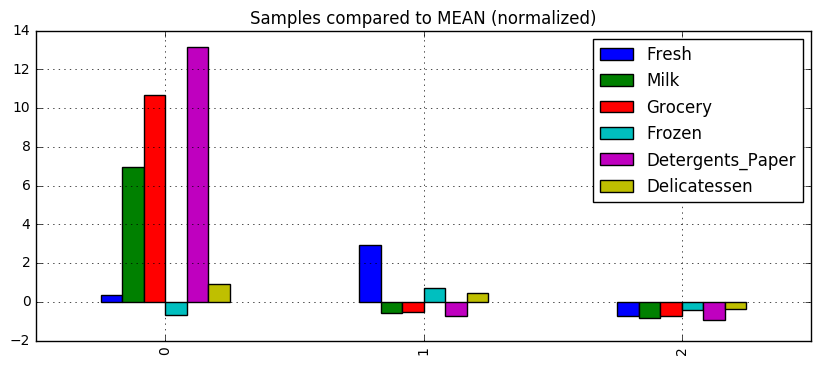

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 239, 350]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


((samples-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Samples compared to MEDIAN (normalized)', grid=True)
((samples-data.mean()) / data.mean()).plot.bar(figsize=(10,4), title='Samples compared to MEAN (normalized)', grid=True)



### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Before guessing what kind of establishment could each of the samples represent, we should analyze how the samples behave in comparison to the mean and median. By doing so, we can better understand how their spending pattern is relative to the statistical description of the dataset.

Analyzing the bar charts above, we can conclude that:
- `350` (#2) spending pattern is very close to the median and some degrees (0.5 to 0.25 times the mean) below the mean of the dataset. Because of this we can also infer that the distribution of this dataset is probably right skewed (MODE < MEDIAN < MEAN).
- `85` (#0) spending pattern is much higher than the median and the mean for the features `Detergents_Paper`, `Grocery` and `Milk`, and around the same for the other features. If `85` is not an outlier on these 3 features, it is a very distinctive data point on this dataset.
- `239` (#1) spending pattern is higher than the median and the mean for the feature `Fresh` and around the same for the other features.

Considering these conclusions, I would guess that:
1. `85` (#0) is a hotel or hotel chain, because it's spending seems similar to a household, but in larger scale compared to the other samples.
2. `239` (#1) is a big restaurant or a restaurant chain, because it spends a lot on fresh food and other food-related products.
3. `350` (#2) is a common small business, probably a restaurant or a cafe, because its spending pattern is very close to the median and mean to the dataset. Also comparing the absolute monetary values shown on the table above, we can see that this spending pattern is similar to `239`, but in smaller scale. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
for selected_feature in data.keys():
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(selected_feature, axis=1, inplace=False)

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[selected_feature], test_size=0.25, random_state=10)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=10)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "{}: {:.4}".format(selected_feature, score)
    print "Features importances: ", zip(new_data, regressor.feature_importances_)
    print ""

Fresh: -0.3792
Features importances:  [('Milk', 0.23774839696616887), ('Grocery', 0.19582290075010092), ('Frozen', 0.30799043448312968), ('Detergents_Paper', 0.10746643320156797), ('Delicatessen', 0.15097183459903243)]

Milk: -0.4421
Features importances:  [('Fresh', 0.25606267979386999), ('Grocery', 0.54381014727836341), ('Frozen', 0.035365946278442889), ('Detergents_Paper', 0.066274713940244173), ('Delicatessen', 0.098486512709079682)]

Grocery: 0.7238
Features importances:  [('Fresh', 0.014597938857863386), ('Milk', 0.072102515008957591), ('Frozen', 0.023706904850491404), ('Detergents_Paper', 0.86334572442669), ('Delicatessen', 0.026246916855997667)]

Frozen: 0.05485
Features importances:  [('Fresh', 0.15780204035826392), ('Milk', 0.10817403955906203), ('Grocery', 0.059273879752943265), ('Detergents_Paper', 0.22484720858186097), ('Delicatessen', 0.44990283174786971)]

Detergents_Paper: 0.4944
Features importances:  [('Fresh', 0.012211921190053788), ('Milk', 0.043595475012336835), ('

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I tried to predict all features. The results were:

| Predicted feature | R<sup>2</sup> score | Conclusion |
| ----------------- | ------------------- | ---------- |
|  Fresh  |  -0.3792  | This feature is needed. |
|  Milk  |  -0.4421  | This feature is needed. |
|  Grocery  |  0.7238  | **This feature is not needed.** |
|  Frozen  |  0.05485  | This feature is needed. |
|  Detergents_Paper  |  0.4944  | **Inconclusive** |
|  Delicatessen  |  -10.56  | This feature is needed. |

The Decision Tree Regressor only had a good R<sup>2</sup> score while predicting the `Grocery` feature. For `Detergents_Paper`, it scored below `.5`, meaning that it is not a bad, but not a good fit either. For all the others, the results were very low, or even negative, which means that the model can't explain the `hidden feature` based on the rest of the data. This means that all features, except `Grocery`, are needed to identify the customers' spending habits. 


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

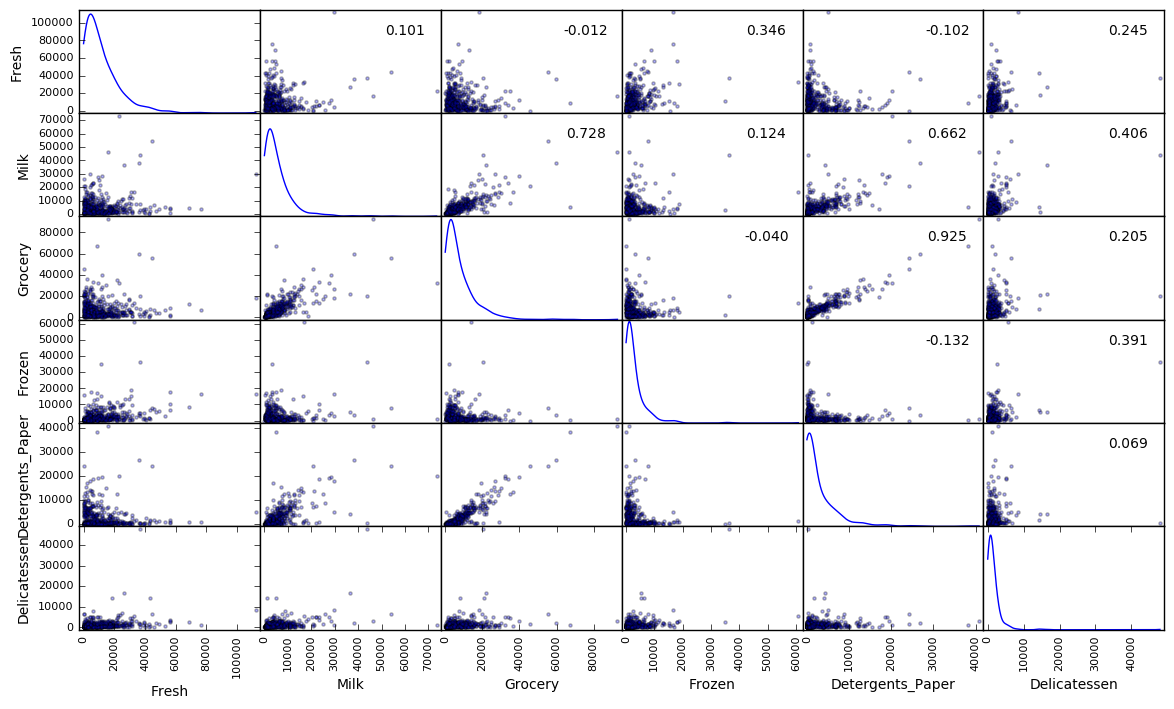

In [7]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Analyzing the diagonal cells of the matrix, it is clear that the data is right skewed (positive) and should be scaled using some logarithmic function.

We can also note that it appears to exist a linear correlation between `Grocery` and `Detergents_Paper`. This finding strengthen the suspicion raised on [Question 2](#Question-2) about the relevance of the `Grocery` feature. The data for these features are distributed in a linear fashion, like is shown in the graph below.

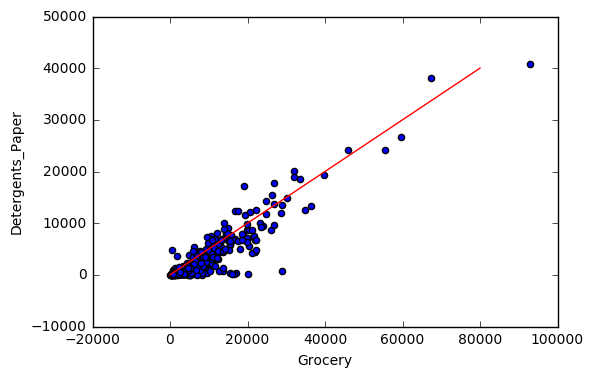

In [8]:
from matplotlib import pyplot
pyplot.scatter(data['Grocery'], data['Detergents_Paper'])
pyplot.xlabel('Grocery')
pyplot.ylabel('Detergents_Paper')
pyplot.plot([0,80000], [0,40000], 'r')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

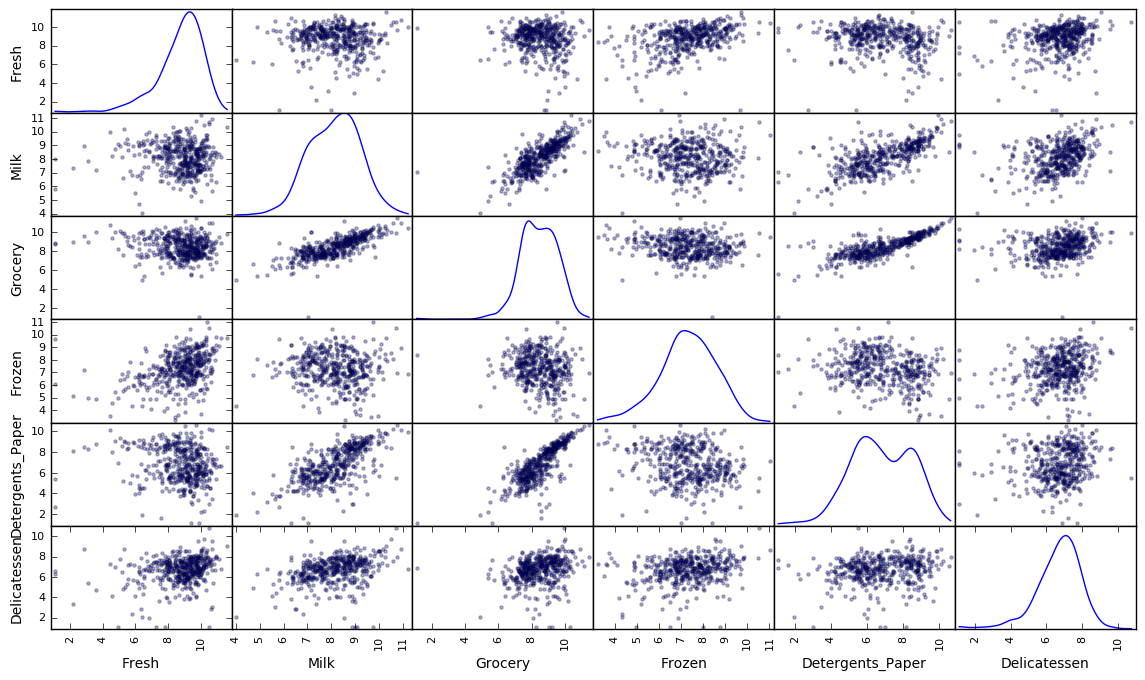

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,10.768338,7.850493,8.237215,8.564649,6.719013,7.720018
2,8.166500,7.002156,7.599401,7.493317,5.153292,6.902743


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
outliers_identified = []


# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    ol = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(ol)
    
    # Store outlier
    for i in ol.index:
        outliers_identified.append(i)
        
     
# OPTIONAL: Select the indices for data points you wish to remove
# outliers = []
# we chose to remove all outliers
outliers  = outliers_identified

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print "{} Outliers identified: {}".format(len(set(outliers_identified)), sorted((outliers_identified)))
print "{} Outliers removed: {}".format(len(set(outliers)), sorted(set(outliers)))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


42 Outliers identified: [38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
42 Outliers removed: [38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are data points considered outliers for more than one feature: 65, 66, 75, 128, 154.

We chose to remove all outliers, because they represent about 10% of the data and we have no information on how the data was collected. Also, [it is known](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3716393/) that unsupervised learning approaches are generally penalized by the presence of outliers in the data.

In a real-world scenario, we should evaluate the performance of the selected model in the presence and absence of outliers to decide if we should remove them or not. As a rule of the thumb, all data points should be considered by the model, except those that introduce noise due to error (for example: mechanical or measurement errors). So even outliers provide information about the problem and should be addressed by the final solution.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [ 0.74520543 -0.15440822  0.02038937 -0.26695167  0.23485013 -0.54221164]
 [-0.26670888 -0.13749532 -0.0709773   0.71328102  0.31568384 -0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [ 0.05428877  0.51774387 -0.82668599 -0.04707807  0.20803866  0.00937317]]


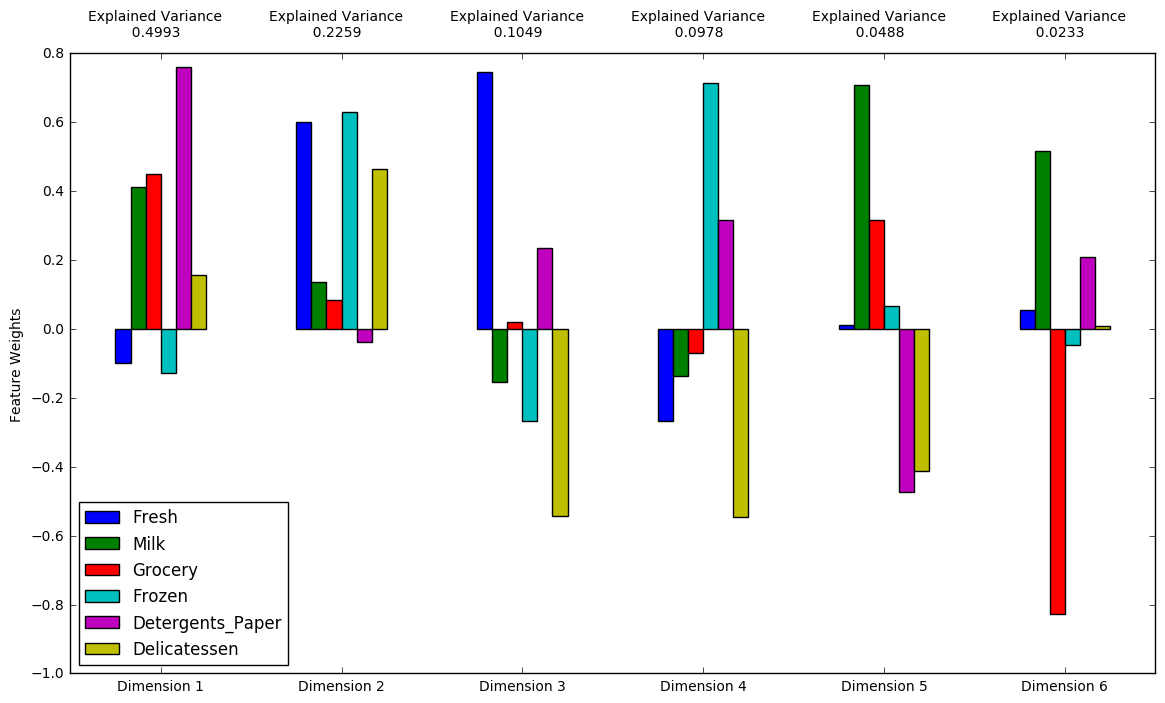

In [12]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print pca.components_


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [13]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


**Answer:**

- The **first** principal component explained variance is `0.4993`.
- The **second** principal component explained variance is `0.2259`.
- Together their explained variance is `0.7252`.

- The **third** principal component explained variance is `0.1049`.
- The **fourth** principal component explained variance is `0.0978`.
- The first four principal components explained variance is `0.9279`.


To understand what the components best represent, one can use the feature weights as the following:
- the magnitude of some feature weight determines how much variance on that feature is captured by the component. For example: given that a principal component has some feature weight of 0.5, then given some data point, if this feature is increased by 1, the component should be increased by 0.5.
- the sign of some feature weight determines the direction in which the component captures the variation on that feature. Using the example above, if the feature weight was negative, an increase on the studied feature would result in a proportional decrease on the principal component.


So, using our own dataset, the principal components are:

| Principal Component | Fresh  | Milk    | Grocery | Frozen  | Detergents_Paper| Delicatessen |
|-------------------- | ------ | ------- | ------- | ------- | --------------- | ------------ |
| 1                   | -0.0975|  0.4108 |  0.4511 | -0.1280 |  0.7595         |  0.1578      |
| 2                   |  0.6007|  0.1369 |  0.0851 |  0.6299 | -0.0376         |  0.4634      |
| 3                   |  0.7452| -0.1544 |  0.0203 | -0.2669 |  0.2348         | -0.5422      |
| 4                   | -0.2667| -0.1374 | -0.0709 |  0.7132 |  0.3156         | -0.5445      |
| 5                   |  0.0114|  0.7082 |  0.3168 |  0.0671 | -0.4729         | -0.4119      |
| 6                   |  0.0542|  0.5177 | -0.8266 | -0.0470 |  0.2080         |  0.0093      |


As explained, the table above shows both, the direction and magnitude, of each feature weight on the Principal Components:
- Principal Component #1 represents most of the variation given by Milk, Grocery and Detergents_Paper.
- Principal Component #2 represents most of the variation given by Fresh, Frozen and Delicatessen.
- Principal Component #3 represents most of the variation given by Fresh and Delicatessen.
- Principal Component #4 represents most of the variation given by Frozen, Detergents_Paper and Delicatessen.
- Principal Component #5 represents most of the variation given by Milk, Detergents_Paper and Delicatessen.
- Principal Component #6 represents most of the variation given by Grocery and Milk.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.5240,1.1625,0.6076,-0.5663,0.4874,-0.2678
1,-0.4245,2.1935,0.5881,-0.1513,-0.4982,0.0503
2,-1.9879,-0.5349,-0.8714,-0.1089,-0.3256,-0.2858


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.5240,1.1625
1,-0.4245,2.1935
2,-1.9879,-0.5349


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

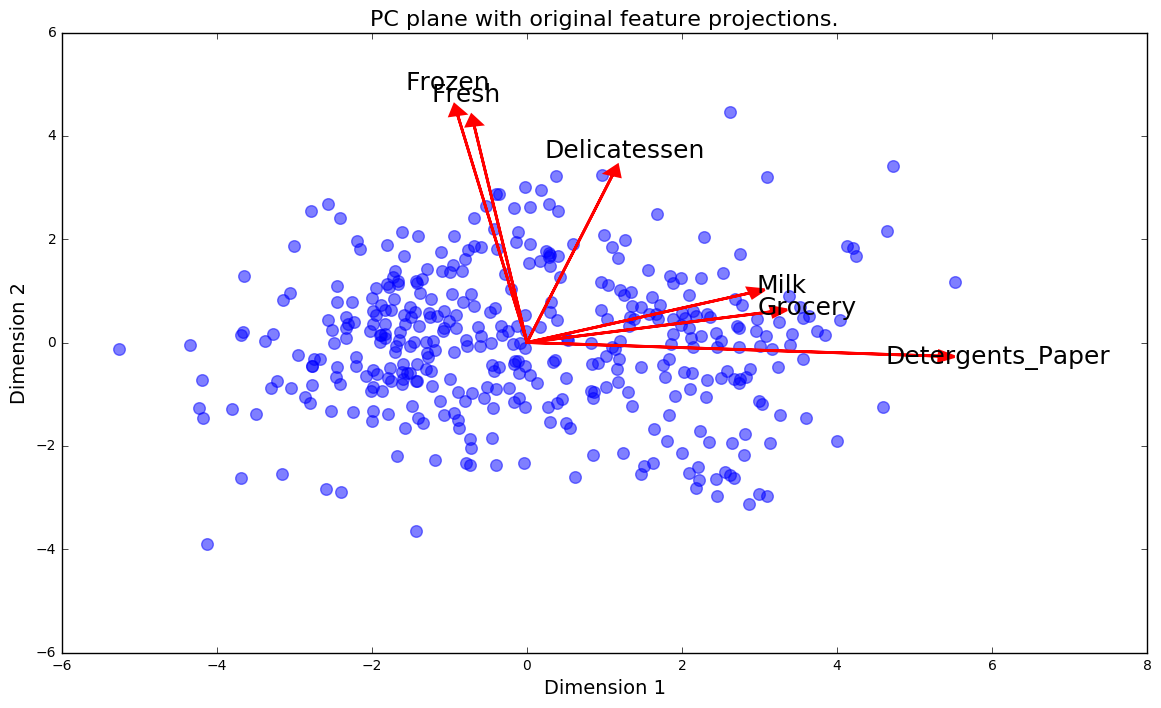

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-means clustering** is an algorithm where we try to split the data points into clusters by adding `k` centroids into the data set and then iteratively moving them through the feature space until a number of steps is reached. Because the centroids are added at random positions, we run the algorithm multiple times and average the results, hence the `means` in K-means.

#### Advantages
- Fast: O(n)
- Works well with balanced clusters with similar density, specially spherical clusters.

#### Disadvantages
- Will always output spherical clusters
- Points are assigned only to the closest centroid (i.e: each point has only one of k-possible classifications)
- K-value parameter might not be known and is difficult to predict
- Sensitive to outliers and local optima

---


"A **Gaussian Mixture Model** is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians." ([sklearn documentation](http://scikit-learn.org/stable/modules/mixture.html))

#### Advantages
- Probabilistic classifier
- Accomodates mixed membership
- More flexible in terms of cluster covariance (i.e.: non-spherical clusters)

#### Disadvantages
- Singularities can occur when there aren't enough data points per mixture
- Will always use the maximum number of components available
- Number of mixtures parameter might not be known and is difficult to predict

---

Given our observations of the data, we could enumerate the following assumptions:
- Discrete Classification Problem
- No outliers present
- Distribution is well balanced

Based of these assumptions, **K-Means** is probably the best choice, because it is faster and simpler (*Occam's Razor*). We should not disregard Gaussian Mixture though, because it can provide clusters with non-spherical shapes that might fit the data better than K-Means' spherical clusters. So we'll try both.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Helper function to compute silhouette score
def calculate_silhouette_score(clusterer):
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds, random_state=10)
    return score, preds

# We have to output these variables
clusterer = None
score = 0
preds = None
centers = None
sample_preds = None
number_of_clusters = 0
selected_clusterer = None


# Number of maximum clusters to try
MAX_CLUSTERS = 30

# Verbose Output
VERBOSE = True

for i in xrange(2, MAX_CLUSTERS + 1):
    gmm = GMM(n_components=i, random_state=10)
    gmm_score, gmm_preds = calculate_silhouette_score(gmm)

    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans_score, kmeans_preds = calculate_silhouette_score(kmeans)
    
    if VERBOSE:
        print "{:2d} clusters: GMM ({:.4f}) KMeans ({:.4f})".format(i, gmm_score, kmeans_score)

    if gmm_score > kmeans_score:
        if gmm_score > score:
            clusterer = gmm
            score = gmm_score
            preds = gmm_preds
            centers = gmm.means_
            sample_preds = gmm.predict(pca_samples)
            number_of_clusters = i
            selected_clusterer = "GMM"
    else:
        if kmeans_score > score:
            clusterer = kmeans
            score = kmeans_score
            preds = kmeans_preds
            centers = kmeans.cluster_centers_
            sample_preds = kmeans.predict(pca_samples)
            number_of_clusters = i
            selected_clusterer = "KMeans"

print "Best result: {} scored {:.4f} with {} clusters".format(selected_clusterer, score, number_of_clusters)

 2 clusters: GMM (0.4436) KMeans (0.4472)
 3 clusters: GMM (0.3573) KMeans (0.3640)
 4 clusters: GMM (0.2916) KMeans (0.3312)
 5 clusters: GMM (0.2636) KMeans (0.3523)
 6 clusters: GMM (0.3071) KMeans (0.3628)
 7 clusters: GMM (0.2953) KMeans (0.3545)
 8 clusters: GMM (0.3313) KMeans (0.3772)
 9 clusters: GMM (0.2734) KMeans (0.3659)
10 clusters: GMM (0.2236) KMeans (0.3496)
11 clusters: GMM (0.2386) KMeans (0.3548)
12 clusters: GMM (0.2086) KMeans (0.3554)
13 clusters: GMM (0.1876) KMeans (0.3643)
14 clusters: GMM (0.1153) KMeans (0.3551)
15 clusters: GMM (0.1922) KMeans (0.3561)
16 clusters: GMM (0.1345) KMeans (0.3370)
17 clusters: GMM (0.1273) KMeans (0.3620)
18 clusters: GMM (0.0920) KMeans (0.3452)
19 clusters: GMM (0.1426) KMeans (0.3457)
20 clusters: GMM (0.1381) KMeans (0.3507)
21 clusters: GMM (0.1841) KMeans (0.3411)
22 clusters: GMM (0.0941) KMeans (0.3552)
23 clusters: GMM (0.1091) KMeans (0.3551)
24 clusters: GMM (0.1002) KMeans (0.3582)
25 clusters: GMM (0.1166) KMeans (

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I tried both GMM and KMeans with mixtures/clusters varying from 2 to 30 and the conclusions were:
- Both algorithms reported best silhouette score using only 2 mixtures/clusters.
- Best result overall was KMeans with 0.4472 silhouette score.
- GMM's score gradually decreased as the number of mixtures increased.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

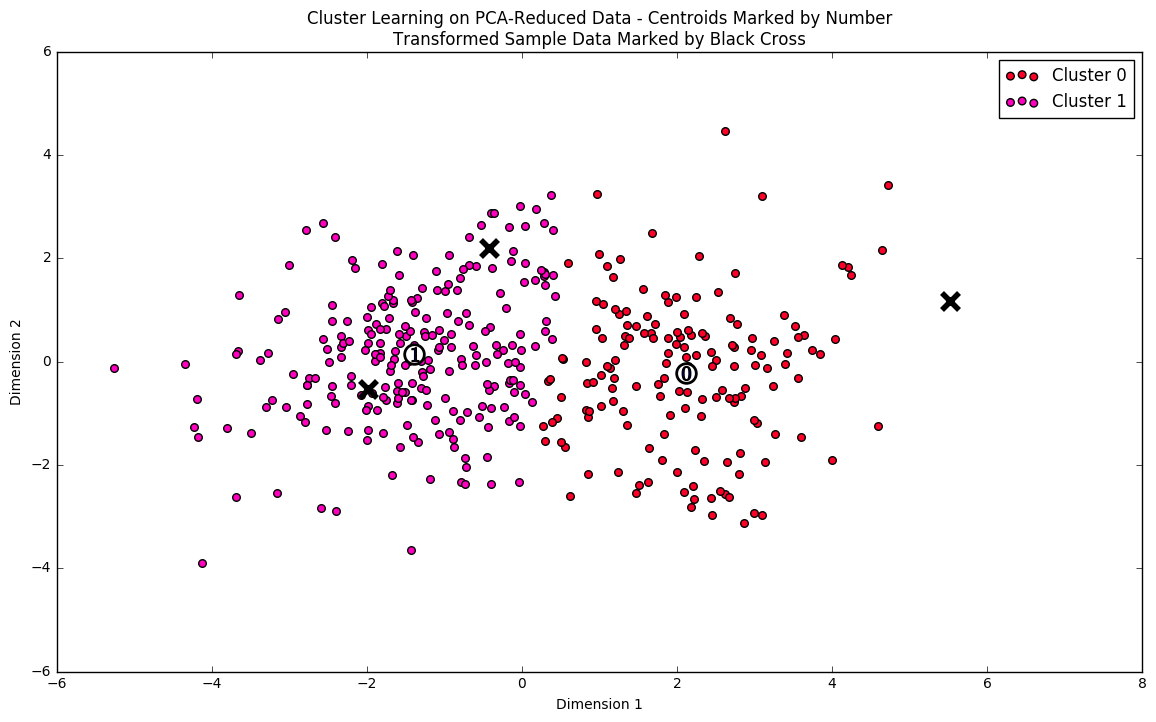

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-6576.0,1984.0,3581.0,-1949.0,1563.0,-389.0
Segment 1,-2549.0,-3858.0,-5502.0,-872.0,-2574.0,-754.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3080.0,4153.0,6776.0,-403.0,3628.0,170.0
Segment 1,947.0,-1689.0,-2307.0,674.0,-509.0,-195.0


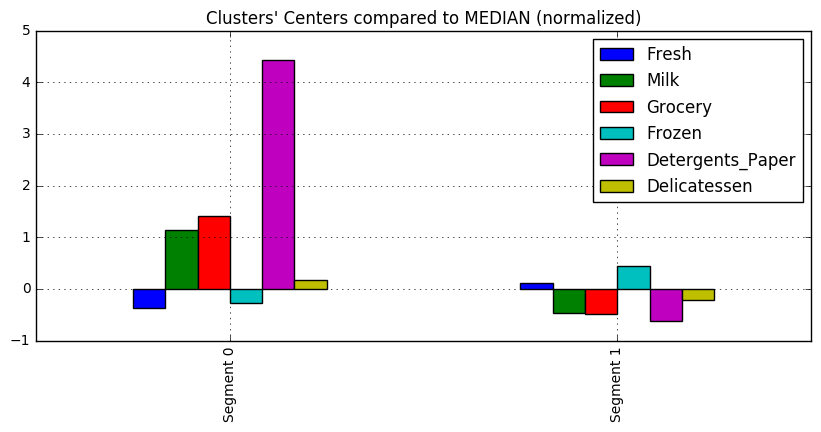

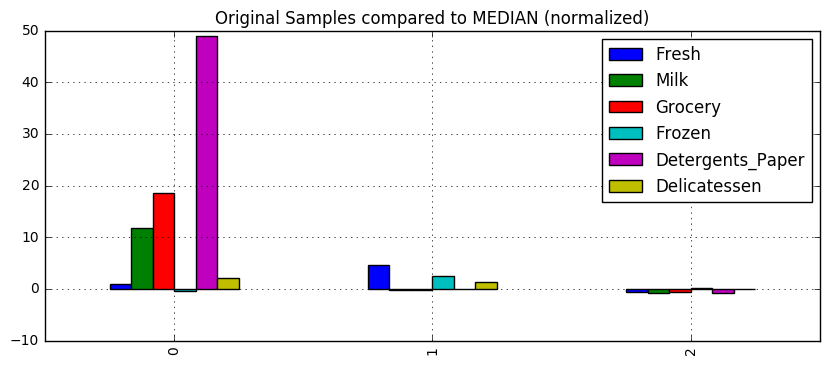

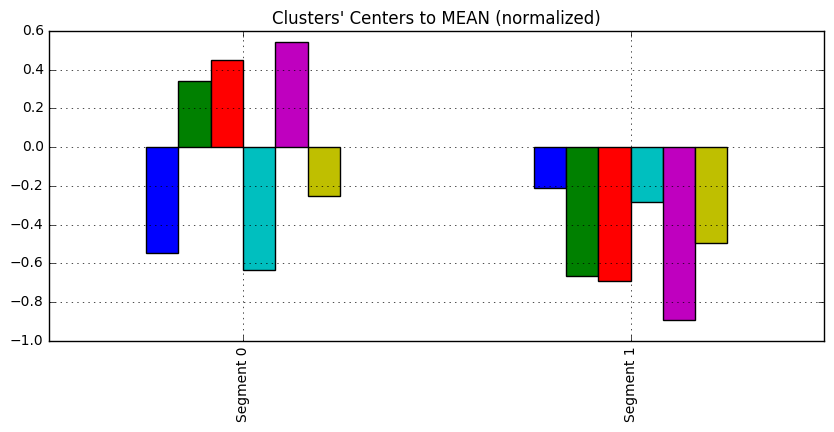

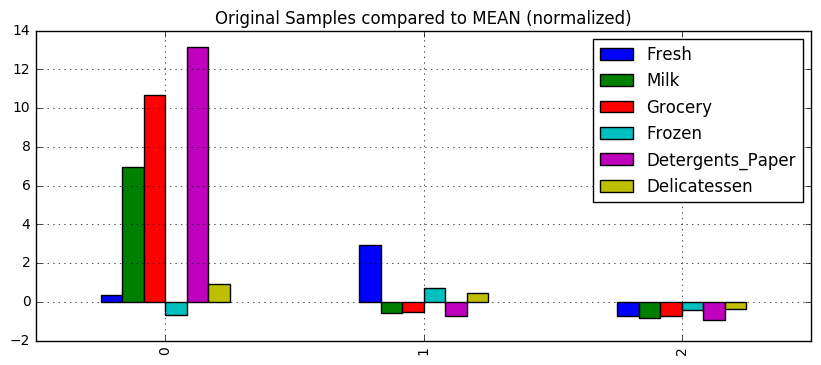

In [21]:
display(true_centers - data.mean().round())
display(true_centers - data.median().round())

((true_centers-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Clusters\' Centers compared to MEDIAN (normalized)', grid=True)
((samples-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Original Samples compared to MEDIAN (normalized)', grid=True)
((true_centers-data.mean()) / data.mean()).plot.bar(figsize=(10,4), title='Clusters\' Centers to MEAN (normalized)', grid=True, legend=False)
((samples-data.mean()) / data.mean()).plot.bar(figsize=(10,4), title='Original Samples compared to MEAN (normalized)', grid=True)




**Answer:**

Before answering this question, we'll need to recall the customers segments we specified on [Question 1](#Question-1). The bar charts shown on the cell above provide valuable insight on how the clusters' centers and the samples share similar behaviour when compared to the mean and median of the distribution. This is our first indicator that:

- Sample 0 (which was guessed as *Hotel*) is similar to Segment 0.
- Sample 1 (which was guessed as *Restaurant*) is similar to Segment 1.


Continuing the analysis, we classified the spending patterns of *Hotels* and *Restaurants* as:

<p>&nbsp;</p>

| SEGMENT | Most | A lot | Some | Few |
| ------- | ---- | ----- | ---- | --- |
| HOTEL | Grocery | Milk <br> Detergents_Paper | Fresh | Delicatessen <br> Frozen|
| RESTAURANT | Fresh | - | Frozen<br>Grocery<br>Milk<br>Delicatessen | Detergents_Paper |

<p>&nbsp;</p>



So using these definitions and insights, we get:

<p>&nbsp;</p>

| SEGMENT | Most | A lot | Some | Few |
| ------- | ---- | ----- | ---- | --- |
| SEGMENT 0 | Grocery | Milk | Fresh<br>Detergents_Paper | Delicatessen <br> Frozen|
| SEGMENT 1 | Fresh | - | Frozen<br>Grocery<br>Milk | Detergents_Paper<br>Delicatessen |

<p>&nbsp;</p>

And merging the two tables, we get:

<p>&nbsp;</p>

| SEGMENT | Most | A lot | Some | Few |
| ------- | ---- | ----- | ---- | --- |
| HOTEL | Grocery | Milk <br> Detergents_Paper | Fresh | Delicatessen <br> Frozen|
| SEGMENT 0 | Grocery | Milk | Fresh<br>Detergents_Paper | Delicatessen <br> Frozen|
| RESTAURANT | Fresh | - | Frozen<br>Grocery<br>Milk<br>Delicatessen | Detergents_Paper |
| SEGMENT 1 | Fresh | - | Frozen<br>Grocery<br>Milk | Detergents_Paper<br>Delicatessen |

<p>&nbsp;</p>

It is clear that **segment 0 has more similarities with a *Hotel*  ** than a *Restaurant* and **segment 1 has more similarities with a *Restaurant* ** than a *Hotel*.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred, "(", ("Hotel" if pred == 0 else "Restaurant"), ")"
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])
    print 

Sample point 0 predicted to be in Cluster 0 ( Hotel )
The distance between sample point 0 and center of cluster 0:
Fresh               10693.0
Milk                38417.0
Grocery             81248.0
Frozen                -97.0
Detergents_Paper    36383.0
Delicatessen         1808.0
dtype: float64

Sample point 1 predicted to be in Cluster 1 ( Restaurant )
The distance between sample point 1 and center of cluster 1:
Fresh               38042.0
Milk                  629.0
Grocery              1330.0
Frozen               3043.0
Detergents_Paper      521.0
Delicatessen         1482.0
dtype: float64

Sample point 2 predicted to be in Cluster 1 ( Restaurant )
The distance between sample point 2 and center of cluster 1:
Fresh              -5930.0
Milk                -839.0
Grocery             -452.0
Frozen              -404.0
Detergents_Paper    -134.0
Delicatessen         224.0
dtype: float64



**Answer:**

The algorithm output was:

    Sample point 0 predicted to be in Cluster 0 ( Hotel )
    Sample point 1 predicted to be in Cluster 1 ( Restaurant )
    Sample point 2 predicted to be in Cluster 1 ( Restaurant )
    
From the bar charts generated on [the answer to Question 8](#Question-8) and all the other information provided above we can assert that the predictions made [on the answer to Question 1](#Question-1) are consistent with the results above.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The wholesale distributor can use the customer segments to split its customers into two distinct segments. On these segments, we could run A/B tests to identify if the change would have a positive, neutral or negative outcome. To run an A/B test, we would:
1. Select a customer segment
2. From this customer segment, we would select 2 representative samples:
    - one sample would be labeled *control group*
    - the other would be labeled *treatment group*
3. Then, we would change the delivery service for the *treatment group*
4. Finally, we would ask for feedback on both groups about the delivery service and compare the results.
5. If the control group has a higher satisfaction rate than the treatment group, we would evaluate the change as negative and positive otherwise.
6. Finally, we could repeat the whole process on the other customer segment.

The main idea behind A/B tests is trying to stabilize all variables and then changing a single variable to measure its impact on the whole process. In this case, the variable we are measuring is the delivery service. To stabilize the other *unknown* variables, we will use the customer segments engineered feature. This assumes that customers with similar spending habits might have the same needs regarding delivery services.

Finally, on speculation ground, we could assume that reducing the number of deliveries from 5 days/week to 3 days/week, would have a negative impact for customers in *Segment 1*, because they have a higher demand for *Fresh* products. In contrast, customers in *Segment 0* might not be affected by the change, because their demand for *Fresh* products isn't so significative.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The easiest solution to this question would be to train a `K-Nearest-Neighbors` classifier using the original customer data as training data and the engineered feature (aka *customer segment*) as the label.

#### Benefits

Because of the similarities between a KNN classifier and clustering techniques, it would be pretty easy to explain this approach to our customer. Other benefits of using KNN is that it is very cheap to train (`O(1)`) and requires no pre-processing of the data.

#### Drawbacks

The main drawback of using KNN is that the classification of new customers would be linear to the amount of existing data (`O(n)`). If we pre-processed the data, this could be improved to logarithmic time (`O(lg n)`).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

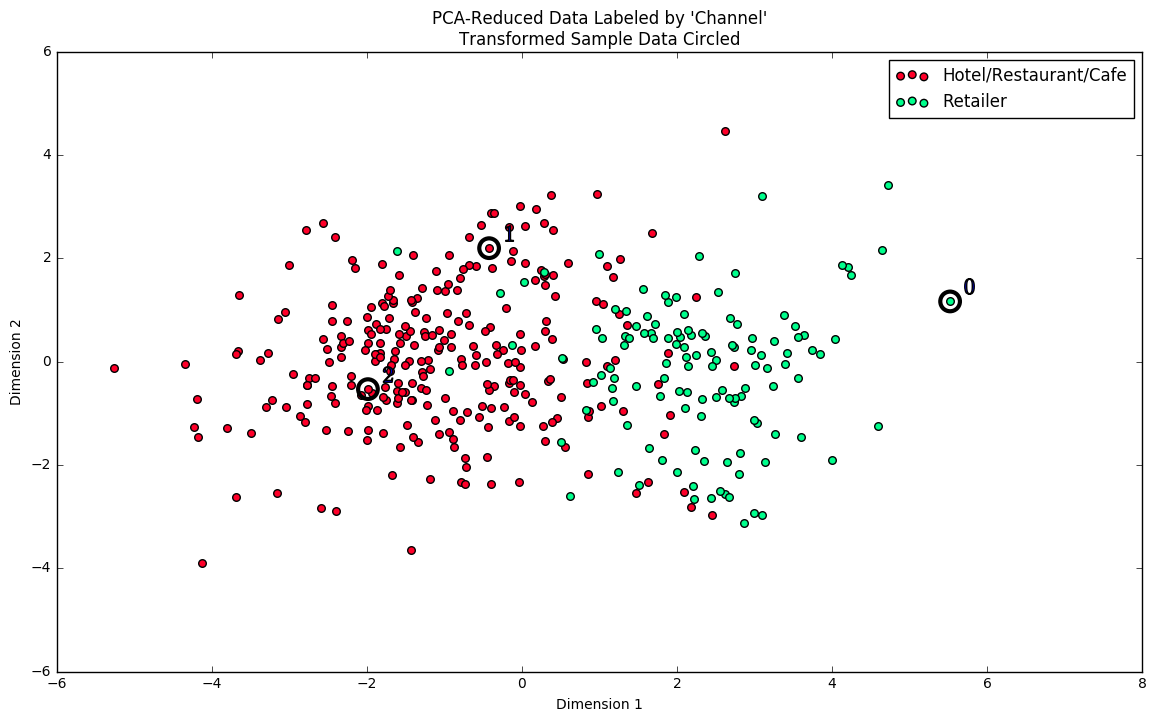

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm and the number of clusters I've chosen are very close to a match to the underlying distribution. The number of clusters is exactly the same (2) and the clusters found classify most of the data correctly. The underlying distribution shows the existence of some data points from different segments mixed inside the clusters we found. These points will be misclassified by the model, but it would be impossible to predict them correctly without overfitting.

The classifications shown by the underlying distribution are consistent to our previous definition of customer segments. What we classified as Hotels were in fact Retailers and what we classified as Restaurants were in fact Hotel/Restaurants/Cafe.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.